In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib.dates as mdates
from sklearn.preprocessing import MinMaxScaler
import math
from minisom import MiniSom
import numpy as np
from tslearn.metrics import soft_dtw
from tslearn.barycenters import dtw_barycenter_averaging
from tslearn.clustering import TimeSeriesKMeans
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
%matplotlib inline

In [134]:
grade = pd.read_csv('오슬로등급.csv', encoding='euc-kr')
grade

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,기업코드_x,사업자번호,산업군_x,인적자원구성원 등급,인적자원복지등급,인적자원개발등급,연구개발투자등급,...,연구개발논문등급,연구개발특허등급,연구개발제품시장성등급,광고캠페인효과등급,일반평판등급,사업계획등급,Cluster,CRscore,기업코드_y,산업군_y
0,0,0,0,1612,1138157661,"기타 측정, 시험, 항해, 제어 및 정밀기기 제조업",2.872289,6.542271,2.963651,2.872289,...,11.942720,3.457772,-0.042350,0.0,-0.502859,-0.615088,Cluster 27,0.045548,1612.0,"기타 측정, 시험, 항해, 제어 및 정밀기기 제조업"
1,4,4,4,1134,2208658212,시스템 소프트웨어 개발 및 공급업,-0.158567,-0.280965,-2.190570,-0.158567,...,-0.083733,-0.289204,-0.042350,0.0,-0.502859,-0.615088,Cluster 39,-1.396758,1134.0,시스템 소프트웨어 개발 및 공급업
2,5,5,5,1619,2148678402,시스템 소프트웨어 개발 및 공급업,-0.158567,-0.280965,-2.190570,-0.158567,...,-0.083733,-0.289204,-0.042350,0.0,1.397083,1.018323,Cluster 6,-4.642283,1619.0,시스템 소프트웨어 개발 및 공급업
3,6,6,6,1130,2148132740,시스템 소프트웨어 개발 및 공급업,-0.158567,-0.280965,-2.190570,-0.158567,...,-0.083733,-0.289204,-0.042350,0.0,-1.452830,-0.615088,Cluster 57,-0.247917,1130.0,시스템 소프트웨어 개발 및 공급업
4,9,9,9,461,2208137755,시스템 소프트웨어 개발 및 공급업,-0.158567,3.130653,-2.190570,-0.158567,...,-0.083733,3.457772,-0.042350,0.0,0.447112,1.018323,Cluster 12,-4.682826,461.0,시스템 소프트웨어 개발 및 공급업
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5022,6236,2204,2204,8184,1198193229,기타 정보기술 및 컴퓨터운영 관련 서비스업,-0.158567,-0.280965,-2.190570,-0.158567,...,-0.083733,-0.289204,-0.042350,0.0,0.447112,-0.615088,Cluster 41,-2.455591,8184.0,기타 정보기술 및 컴퓨터운영 관련 서비스업
5023,6238,2206,2206,6762,2268135769,일반 통신 공사업,5.903146,3.130653,-2.190570,5.903146,...,-0.083733,3.457772,-0.042350,0.0,0.447112,1.018323,Cluster 27,0.339813,6762.0,일반 통신 공사업
5024,6240,2208,2208,6764,2118788102,시스템 소프트웨어 개발 및 공급업,-0.158567,3.130653,-2.190570,-0.158567,...,-0.083733,3.457772,-0.042350,0.0,-0.502859,-0.615088,Cluster 43,-1.829588,6764.0,시스템 소프트웨어 개발 및 공급업
5025,6241,2209,2209,4056,1348634961,시스템 소프트웨어 개발 및 공급업,-0.158567,3.130653,-2.190570,-0.158567,...,-0.083733,3.457772,-0.042350,0.0,-0.502859,-0.615088,Cluster 20,0.244286,4056.0,시스템 소프트웨어 개발 및 공급업


In [152]:
grade.drop_duplicates('사업자번호')

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,기업코드_x,사업자번호,산업군_x,인적자원구성원 등급,인적자원복지등급,인적자원개발등급,연구개발투자등급,...,연구개발논문등급,연구개발특허등급,연구개발제품시장성등급,광고캠페인효과등급,일반평판등급,사업계획등급,Cluster,CRscore,기업코드_y,산업군_y
0,0,0,0,1612,1138157661,"기타 측정, 시험, 항해, 제어 및 정밀기기 제조업",2.872289,6.542271,2.963651,2.872289,...,11.942720,3.457772,-0.042350,0.0,-0.502859,-0.615088,Cluster 27,0.045548,1612.0,"기타 측정, 시험, 항해, 제어 및 정밀기기 제조업"
1,4,4,4,1134,2208658212,시스템 소프트웨어 개발 및 공급업,-0.158567,-0.280965,-2.190570,-0.158567,...,-0.083733,-0.289204,-0.042350,0.0,-0.502859,-0.615088,Cluster 39,-1.396758,1134.0,시스템 소프트웨어 개발 및 공급업
2,5,5,5,1619,2148678402,시스템 소프트웨어 개발 및 공급업,-0.158567,-0.280965,-2.190570,-0.158567,...,-0.083733,-0.289204,-0.042350,0.0,1.397083,1.018323,Cluster 6,-4.642283,1619.0,시스템 소프트웨어 개발 및 공급업
3,6,6,6,1130,2148132740,시스템 소프트웨어 개발 및 공급업,-0.158567,-0.280965,-2.190570,-0.158567,...,-0.083733,-0.289204,-0.042350,0.0,-1.452830,-0.615088,Cluster 57,-0.247917,1130.0,시스템 소프트웨어 개발 및 공급업
4,9,9,9,461,2208137755,시스템 소프트웨어 개발 및 공급업,-0.158567,3.130653,-2.190570,-0.158567,...,-0.083733,3.457772,-0.042350,0.0,0.447112,1.018323,Cluster 12,-4.682826,461.0,시스템 소프트웨어 개발 및 공급업
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5022,6236,2204,2204,8184,1198193229,기타 정보기술 및 컴퓨터운영 관련 서비스업,-0.158567,-0.280965,-2.190570,-0.158567,...,-0.083733,-0.289204,-0.042350,0.0,0.447112,-0.615088,Cluster 41,-2.455591,8184.0,기타 정보기술 및 컴퓨터운영 관련 서비스업
5023,6238,2206,2206,6762,2268135769,일반 통신 공사업,5.903146,3.130653,-2.190570,5.903146,...,-0.083733,3.457772,-0.042350,0.0,0.447112,1.018323,Cluster 27,0.339813,6762.0,일반 통신 공사업
5024,6240,2208,2208,6764,2118788102,시스템 소프트웨어 개발 및 공급업,-0.158567,3.130653,-2.190570,-0.158567,...,-0.083733,3.457772,-0.042350,0.0,-0.502859,-0.615088,Cluster 43,-1.829588,6764.0,시스템 소프트웨어 개발 및 공급업
5025,6241,2209,2209,4056,1348634961,시스템 소프트웨어 개발 및 공급업,-0.158567,3.130653,-2.190570,-0.158567,...,-0.083733,3.457772,-0.042350,0.0,-0.502859,-0.615088,Cluster 20,0.244286,4056.0,시스템 소프트웨어 개발 및 공급업


In [110]:
grade.dropna(axis=0, inplace=True)

In [111]:
CRscore = pd.read_csv('CRscore.csv', encoding='euc-kr')

In [29]:
grade = pd.merge(grade, CRscore, on='사업자번호', how='left')

In [30]:
grade.dropna(axis=0, inplace=True)

In [112]:
for m in range(len(grade)):
    for n in range(5,20):
        if grade.iloc[m,n] == 'A':
            grade.iloc[m,n] = 5
        elif grade.iloc[m,n] == 'B':
            grade.iloc[m,n] = 4
        elif grade.iloc[m,n] == 'C':
            grade.iloc[m,n] = 3
        elif grade.iloc[m,n] == 'D':
            grade.iloc[m,n] = 2

In [113]:
grade

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,기업코드_x,사업자번호,산업군_x,인적자원구성원 등급,인적자원복지등급,인적자원개발등급,연구개발투자등급,...,연구개발논문등급,연구개발특허등급,연구개발제품시장성등급,광고캠페인효과등급,일반평판등급,사업계획등급,Cluster,CRscore,기업코드_y,산업군_y
0,0,0,0,1612,1138157661,"기타 측정, 시험, 항해, 제어 및 정밀기기 제조업",2.872289,6.542271,2.963651,2.872289,...,11.942720,3.457772,-0.042350,0.0,-0.502859,-0.615088,Cluster 27,0.045548,1612.0,"기타 측정, 시험, 항해, 제어 및 정밀기기 제조업"
1,4,4,4,1134,2208658212,시스템 소프트웨어 개발 및 공급업,-0.158567,-0.280965,-2.190570,-0.158567,...,-0.083733,-0.289204,-0.042350,0.0,-0.502859,-0.615088,Cluster 39,-1.396758,1134.0,시스템 소프트웨어 개발 및 공급업
2,5,5,5,1619,2148678402,시스템 소프트웨어 개발 및 공급업,-0.158567,-0.280965,-2.190570,-0.158567,...,-0.083733,-0.289204,-0.042350,0.0,1.397083,1.018323,Cluster 6,-4.642283,1619.0,시스템 소프트웨어 개발 및 공급업
3,6,6,6,1130,2148132740,시스템 소프트웨어 개발 및 공급업,-0.158567,-0.280965,-2.190570,-0.158567,...,-0.083733,-0.289204,-0.042350,0.0,-1.452830,-0.615088,Cluster 57,-0.247917,1130.0,시스템 소프트웨어 개발 및 공급업
4,9,9,9,461,2208137755,시스템 소프트웨어 개발 및 공급업,-0.158567,3.130653,-2.190570,-0.158567,...,-0.083733,3.457772,-0.042350,0.0,0.447112,1.018323,Cluster 12,-4.682826,461.0,시스템 소프트웨어 개발 및 공급업
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5022,6236,2204,2204,8184,1198193229,기타 정보기술 및 컴퓨터운영 관련 서비스업,-0.158567,-0.280965,-2.190570,-0.158567,...,-0.083733,-0.289204,-0.042350,0.0,0.447112,-0.615088,Cluster 41,-2.455591,8184.0,기타 정보기술 및 컴퓨터운영 관련 서비스업
5023,6238,2206,2206,6762,2268135769,일반 통신 공사업,5.903146,3.130653,-2.190570,5.903146,...,-0.083733,3.457772,-0.042350,0.0,0.447112,1.018323,Cluster 27,0.339813,6762.0,일반 통신 공사업
5024,6240,2208,2208,6764,2118788102,시스템 소프트웨어 개발 및 공급업,-0.158567,3.130653,-2.190570,-0.158567,...,-0.083733,3.457772,-0.042350,0.0,-0.502859,-0.615088,Cluster 43,-1.829588,6764.0,시스템 소프트웨어 개발 및 공급업
5025,6241,2209,2209,4056,1348634961,시스템 소프트웨어 개발 및 공급업,-0.158567,3.130653,-2.190570,-0.158567,...,-0.083733,3.457772,-0.042350,0.0,-0.502859,-0.615088,Cluster 20,0.244286,4056.0,시스템 소프트웨어 개발 및 공급업


In [43]:
from sklearn.preprocessing import StandardScaler

for i in range(5,20):
    grade.iloc[:,i] = StandardScaler().fit_transform((np.array(grade.iloc[:,i])).reshape(-1,1))
# grade.iloc[:,21] = StandardScaler().fit_transform((np.array(grade.iloc[:,21])).reshape(-1,1))

In [44]:
import statsmodels.api as sm

x = grade.iloc[:,5:20]
y = grade['CRscore']

In [45]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(x, y, random_state = 30)

In [46]:
model = sm.OLS(train_target,train_input)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                CRscore   R-squared (uncentered):                   0.058
Model:                            OLS   Adj. R-squared (uncentered):              0.055
Method:                 Least Squares   F-statistic:                              23.05
Date:                Fri, 29 Oct 2021   Prob (F-statistic):                    1.62e-42
Time:                        09:54:05   Log-Likelihood:                         -9123.2
No. Observations:                3770   AIC:                                  1.827e+04
Df Residuals:                    3760   BIC:                                  1.833e+04
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
인적자원구성원 등급  -1.416e+10   1.39e+10     -1.019      0.308   -4.14e+10    1.31e+10
인적자원복지등급       -0.0690      0.358     -0.193      0.847      -0.771       0.633
인적자원개발등급    -4.386e+10    4.3e+10     -1.019      0.308   -1.28e+11    4.05e+10
연구개발투자등급     1.416e+10   1.39e+10      1.019      0.308   -1.31e+10    4.14e+10
연구개발기술지원등급   1.042e+13   1.02e+13      1.019      0.308   -9.62e+12    3.05e+13
연구개발기술가치등급   4.386e+10    4.3e+10      1.019      0.308   -4.05e+10    1.28e+11
연구개발집약도등급       0.0517      0.148      0.350      0.726      -0.238       0.341
연구개발참여인력등급   6.926e+09   6.79e+09      1.019      0.308   -6.39e+09    2.02e+10
연구개발연구소등급      -0.0810      0.091     -0.886      0.376      -0.260       0.098
연구개발논문등급    -1.555e+12   1.53e+12     -1.019      0.308   -4.55e+12    1.44e+12
연구개발특허등급    -9.983e+12   9.79e+12     -1.019      0.308   -2.92e+13    9.22e+12
연구개발제품시장성등급    -0.0731      0.044     -1.662      0.097      -0.159       0.013
광고캠페인효과등급      -0.0016      0.002     -1.019      0.308      -0.005       0.001
일반평판등급         -0.0685      0.089     -0.774      0.439      -0.242       0.105
사업계획등급          0.0633      0.089      0.715      0.475      -0.110       0.237
==============================================================================
Omnibus:                     2154.611   Durbin-Watson:                   0.187
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            25036.738
Skew:                          -2.513   Prob(JB):                         0.00
Kurtosis:                      14.581   Cond. No.                     5.12e+33
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 7.72e-64. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

<AxesSubplot:>

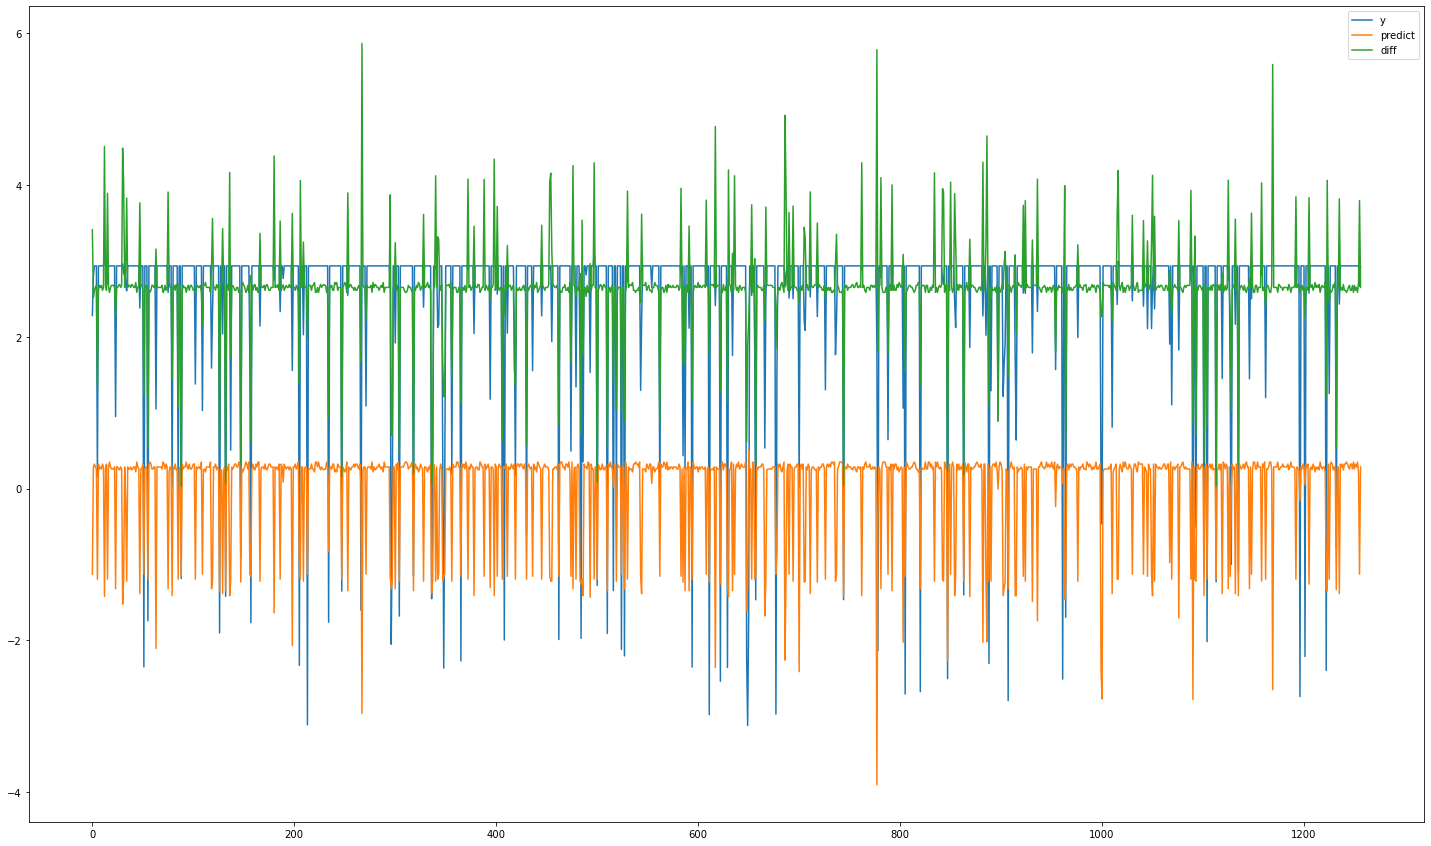

In [47]:
plt.rcParams["figure.figsize"] = (25,15)

visualize = pd.DataFrame(({'y':test_target.values, 'predict': result.predict(test_input), 'diff': np.abs(test_target.values - result.predict(test_input))}))
visualize.reset_index(drop=True, inplace=True)
visualize.plot()

---

In [123]:
four = pd.read_csv('4개기준.csv', encoding='utf-8')

In [124]:
four

,기업코드_x,사업자번호,산업군_x,Cluster,기술혁신능력,기술사업화능력,기술혁신경영능력,기술혁신성과,CRscore
0,1612,1138157661,"기타 측정, 시험, 항해, 제어 및 정밀기기 제조업",Cluster 27,8.557495,5.053124,5.424324,18.364144,0.045548
1,1134,2208658212,시스템 소프트웨어 개발 및 공급업,Cluster 39,-2.658438,-0.331939,-1.398912,-2.563506,-1.396758
2,1619,2148678402,시스템 소프트웨어 개발 및 공급업,Cluster 6,-2.658438,-0.331939,2.134442,-2.563506,-4.642283
3,1130,2148132740,시스템 소프트웨어 개발 및 공급업,Cluster 57,-2.658438,-0.331939,-2.348883,-2.563506,-0.247917
4,461,2208137755,시스템 소프트웨어 개발 및 공급업,Cluster 12,-2.658438,3.258103,4.596088,1.183469,-4.682826
...,...,...,...,...,...,...,...,...,...
5022,8184,1198193229,기타 정보기술 및 컴퓨터운영 관련 서비스업,Cluster 41,-2.658438,-0.331939,-0.448941,-2.563506,-2.455591
5023,6762,2268135769,일반 통신 공사업,Cluster 27,17.583672,3.258103,4.596088,1.183469,0.339813
5024,6764,2118788102,시스템 소프트웨어 개발 및 공급업,Cluster 43,-2.658438,3.258103,2.012706,1.183469,-1.829588
5025,4056,1348634961,시스템 소프트웨어 개발 및 공급업,Cluster 20,-2.658438,3.258103,2.012706,1.183469,0.244286


In [125]:
four['기술혁신능력'] = four['기술혁신능력'] / 5
four['기술사업화능력'] = four['기술사업화능력'] / 3
four['기술혁신경영능력'] = four['기술혁신경영능력'] / 3
four['기술혁신성과'] = four['기술혁신성과'] / 3

In [126]:
four

,기업코드_x,사업자번호,산업군_x,Cluster,기술혁신능력,기술사업화능력,기술혁신경영능력,기술혁신성과,CRscore
0,1612,1138157661,"기타 측정, 시험, 항해, 제어 및 정밀기기 제조업",Cluster 27,1.711499,1.684375,1.808108,6.121381,0.045548
1,1134,2208658212,시스템 소프트웨어 개발 및 공급업,Cluster 39,-0.531688,-0.110646,-0.466304,-0.854502,-1.396758
2,1619,2148678402,시스템 소프트웨어 개발 및 공급업,Cluster 6,-0.531688,-0.110646,0.711481,-0.854502,-4.642283
3,1130,2148132740,시스템 소프트웨어 개발 및 공급업,Cluster 57,-0.531688,-0.110646,-0.782961,-0.854502,-0.247917
4,461,2208137755,시스템 소프트웨어 개발 및 공급업,Cluster 12,-0.531688,1.086034,1.532029,0.394490,-4.682826
...,...,...,...,...,...,...,...,...,...
5022,8184,1198193229,기타 정보기술 및 컴퓨터운영 관련 서비스업,Cluster 41,-0.531688,-0.110646,-0.149647,-0.854502,-2.455591
5023,6762,2268135769,일반 통신 공사업,Cluster 27,3.516734,1.086034,1.532029,0.394490,0.339813
5024,6764,2118788102,시스템 소프트웨어 개발 및 공급업,Cluster 43,-0.531688,1.086034,0.670902,0.394490,-1.829588
5025,4056,1348634961,시스템 소프트웨어 개발 및 공급업,Cluster 20,-0.531688,1.086034,0.670902,0.394490,0.244286


In [67]:
import statsmodels.api as sm

x = four.iloc[:,4:8]
y = four['CRscore']

In [68]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(x, y, random_state = 30)

In [69]:
model = sm.OLS(train_target,train_input)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                CRscore   R-squared (uncentered):                   0.142
Model:                            OLS   Adj. R-squared (uncentered):              0.141
Method:                 Least Squares   F-statistic:                              155.6
Date:                Fri, 29 Oct 2021   Prob (F-statistic):                   2.08e-123
Time:                        10:21:30   Log-Likelihood:                         -5054.6
No. Observations:                3770   AIC:                                  1.012e+04
Df Residuals:                    3766   BIC:                                  1.014e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
기술혁신능력        -0.0630      0.029     -2.169      0.030      -0.120      -0.006
기술사업화능력       -0.7204      0.037    -19.584      0.000      -0.793      -0.648
기술혁신경영능력      -0.1982      0.022     -8.907      0.000      -0.242      -0.155
기술혁신성과         0.4970      0.037     13.437      0.000       0.424       0.569
==============================================================================
Omnibus:                     2543.427   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            35434.148
Skew:                          -3.089   Prob(JB):                         0.00
Kurtosis:                      16.690   Cond. No.                         2.69
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:>

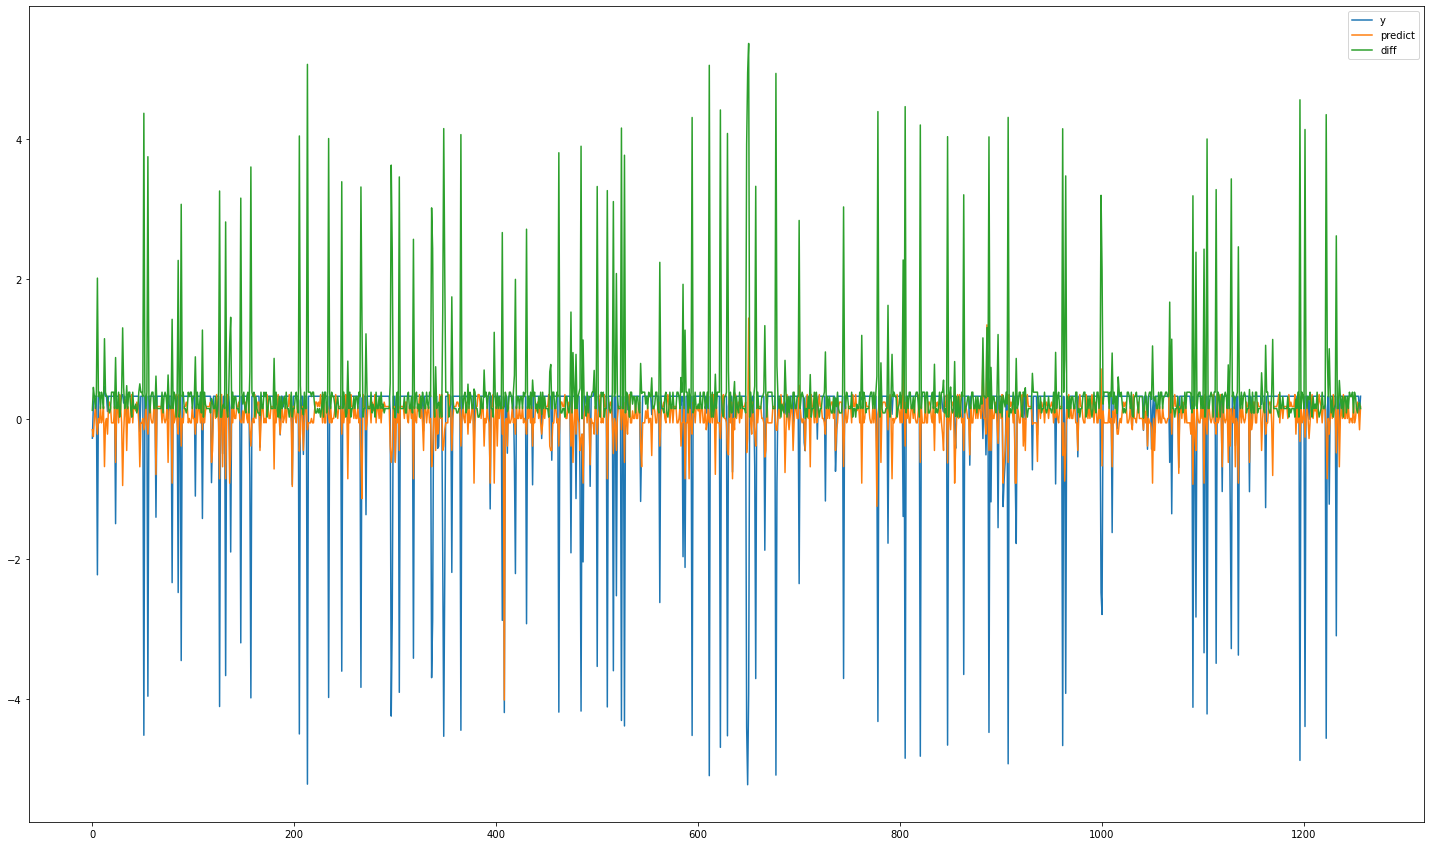

In [70]:
plt.rcParams["figure.figsize"] = (25,15)

visualize = pd.DataFrame(({'y':test_target.values, 'predict': result.predict(test_input), 'diff': np.abs(test_target.values - result.predict(test_input))}))
visualize.reset_index(drop=True, inplace=True)
visualize.plot()

In [284]:
a = pd.read_csv('SOm기준병합.csv', encoding='euc-kr')
a

,Unnamed: 0,사업자번호,Cluster,산업분류코드,기업코드,최종연구개발점수,최종연구개발등급,연구개발투자점수,인적자원구성원 등급,연구개발기술지원점수,...,사업계획 점수,사업계획 등급,경제적 책임 점수,경제적 책임 등급,법률적 책임 점수,법률적 책임 등급,윤리적 책임 점수,윤리적 책임 등급,자선적 책임 점수,자선적 책임 등급
0,0,6138145291,Cluster 1,F42321,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1248127527,Cluster 1,F42321,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,3058172470,Cluster 1,J58221,151.0,82.5,B,45.0,A,22.5,...,80.0,B,100.0,A,100.0,A,100.0,A,50.0,D
3,3,2298130593,Cluster 1,J58222,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1058758282,Cluster 1,J59112,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4002,4002,2061049750,Cluster 9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4003,4003,2148768560,Cluster 9,J58221,1800.0,64.5,D,30.0,D,22.5,...,50.0,D,50.0,D,100.0,A,100.0,A,50.0,D
4004,4004,3148643616,Cluster 9,J62021,6084.0,64.5,D,30.0,D,22.5,...,50.0,D,55.0,D,100.0,A,100.0,A,50.0,D
4005,4005,2090388749,Cluster 9,J58222,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [285]:
CRscore = pd.read_csv('SOm병합_CRscore (4).csv', encoding='euc-kr')
CRscore.dropna(axis=0, inplace=True)
CRscore = CRscore.drop_duplicates('사업자번호')

In [286]:
CRscore.reset_index(drop=True, inplace=True)

In [287]:
from sklearn.preprocessing import StandardScaler

for i in range(7,22):
    CRscore.iloc[:,i] = StandardScaler().fit_transform((np.array(CRscore.iloc[:,i])).reshape(-1,1))

In [288]:
# CRscore.to_csv('CRscore_검증.csv', encoding='euc-kr')

In [297]:
CRscore['CRscore']

0       1.161925
1       0.855668
2       1.096892
3       0.905909
4       1.092309
          ...   
2139    1.744492
2140    1.736213
2141    1.161857
2142    1.804883
2143    1.679300
Name: CRscore, Length: 2144, dtype: float64

In [290]:
CRscore['기술혁신능력'] = (CRscore['연구개발투자점수'] + CRscore['인적자원개발점수'] + CRscore['인적자원구성점수'] + CRscore['연구개발 연구소 점수']) /4
CRscore['기술사업화능력'] = (CRscore['연구개발 제품시장성 점수'] + CRscore['연구개발기술지원점수'] + CRscore['광고 캠페인 효과 점수']) / 3
CRscore['기술혁신경영능력'] = (CRscore['인적자원복지점수'] + CRscore['사업계획 점수'] + CRscore['일반 평판 점수']) / 3
CRscore['기술혁신성과'] = (CRscore['연구개발기술가치점수'] + CRscore['연구개발논문 점수'] + CRscore['연구개발특허 점수']) / 3

In [291]:
CRscore.iloc[:,22:]

,기술혁신능력,기술사업화능력,기술혁신경영능력,기술혁신성과
0,-0.377793,-0.390280,-0.706778,-0.480038
1,-0.377793,-0.390280,-0.270567,-0.480038
2,-0.377793,0.272483,0.608801,0.200455
3,-0.377793,0.272483,0.212629,1.313021
4,-0.377793,-0.390280,-0.644463,-0.480038
...,...,...,...,...
2139,-0.377793,-0.390280,-0.519831,-0.480038
2140,-0.377793,0.272483,0.675632,1.034879
2141,-0.377793,-0.390280,-0.769094,-0.480038
2142,-0.377793,0.290918,0.172590,0.200455


In [292]:
import statsmodels.api as sm

x = CRscore.iloc[:,22:]
y = CRscore['CRscore']

In [300]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(x, y, random_state = 30)

In [301]:
model = sm.OLS(train_target,train_input)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                CRscore   R-squared (uncentered):                   0.007
Model:                            OLS   Adj. R-squared (uncentered):              0.004
Method:                 Least Squares   F-statistic:                              2.720
Date:                Fri, 29 Oct 2021   Prob (F-statistic):                      0.0283
Time:                        13:34:18   Log-Likelihood:                         -2577.5
No. Observations:                1608   AIC:                                      5163.
Df Residuals:                    1604   BIC:                                      5185.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
기술혁신능력        -0.0486      0.036     -1.339      0.181      -0.120       0.023
기술사업화능력       -0.0282      0.069     -0.407      0.684      -0.164       0.108
기술혁신경영능력       0.0856      0.060      1.422      0.155      -0.032       0.204
기술혁신성과        -0.1065      0.066     -1.622      0.105      -0.235       0.022
==============================================================================
Omnibus:                      412.577   Durbin-Watson:                   1.728
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              128.546
Skew:                          -0.478   Prob(JB):                     1.22e-28
Kurtosis:                       1.998   Cond. No.                         3.25
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:>

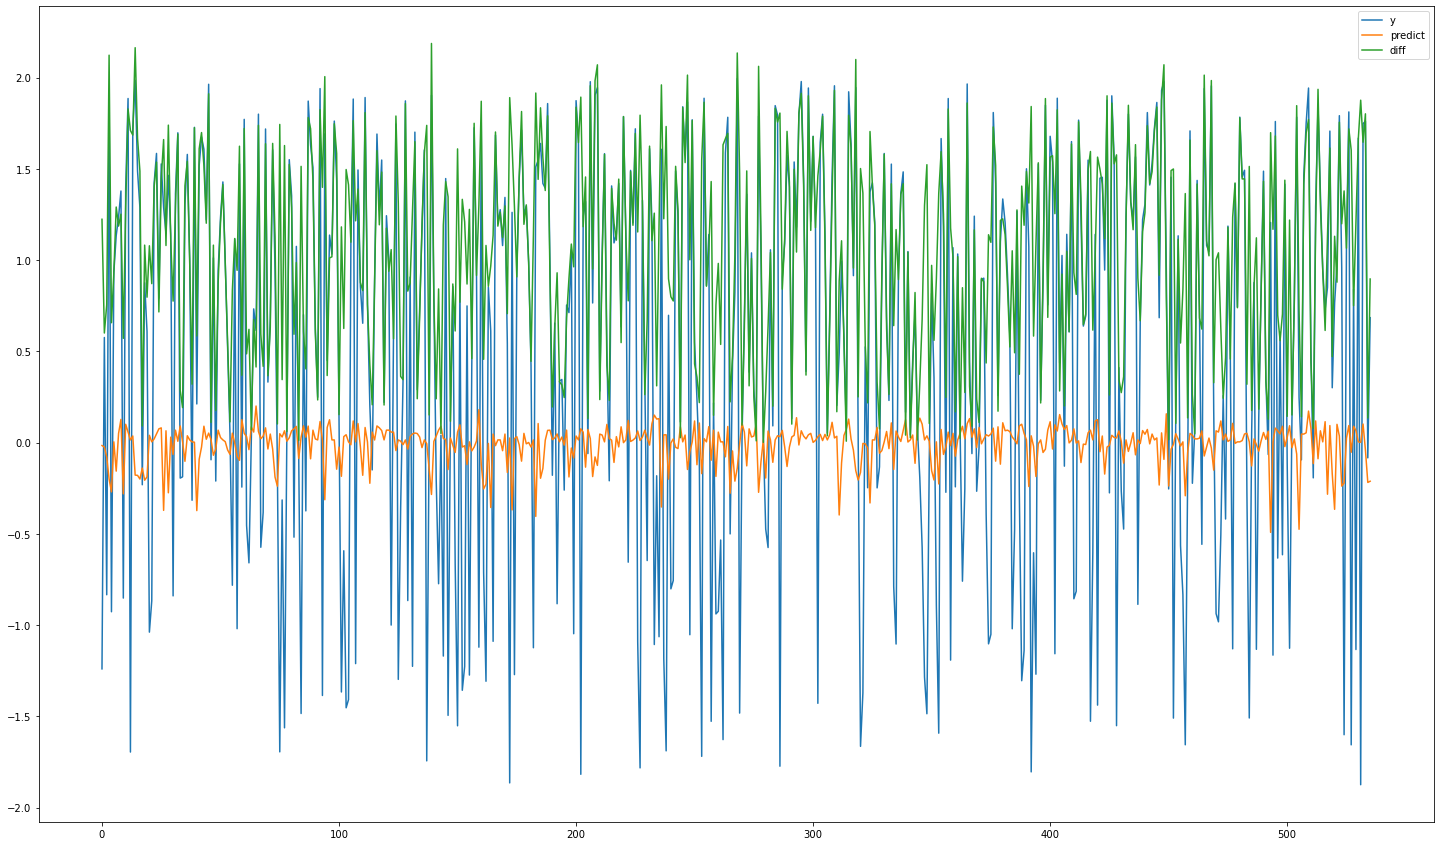

In [302]:
plt.rcParams["figure.figsize"] = (25,15)

visualize = pd.DataFrame(({'y':test_target.values, 'predict': result.predict(test_input), 'diff': np.abs(test_target.values - result.predict(test_input))}))
visualize.reset_index(drop=True, inplace=True)
visualize.plot()

---

In [191]:
CRscore_z = pd.read_csv('CRscore_Standard.csv', encoding='utf-8')

In [192]:
CRscore_z

,Unnamed: 0.1,사업자번호,Cluster,CRscore,기술혁신능력,기술사업화능력,기술혁신경영능력,기술혁신성과
0,3451,5838600038,Cluster 1,1.161925,7.22307,-0.390280,-0.706778,-0.480038
1,3891,1148700862,Cluster 1,0.855668,7.22307,-0.390280,-0.270567,-0.480038
2,3862,1378612855,Cluster 1,1.096892,7.22307,0.272483,0.608801,0.200455
3,5072,2648108060,Cluster 1,0.905909,7.22307,0.272483,0.212629,1.313021
4,4251,2148826252,Cluster 1,1.092309,7.22307,-0.390280,-0.644463,-0.480038
...,...,...,...,...,...,...,...,...
2139,1533,1218136968,Cluster 9,1.744492,7.22307,-0.390280,-0.519831,-0.480038
2140,1706,6091424844,Cluster 9,1.736213,7.22307,0.272483,0.675632,1.034879
2141,4411,1208798527,Cluster 9,1.161857,7.22307,-0.390280,-0.769094,-0.480038
2142,2696,3038144167,Cluster 9,1.804883,7.22307,0.290918,0.172590,0.200455


In [193]:
import statsmodels.api as sm

x = CRscore_z.iloc[:,4:8]
y = CRscore_z['CRscore']

In [194]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(x, y, random_state = 30)

In [195]:
model = sm.OLS(train_target,train_input)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                CRscore   R-squared (uncentered):                   0.143
Model:                            OLS   Adj. R-squared (uncentered):              0.141
Method:                 Least Squares   F-statistic:                              66.90
Date:                Fri, 29 Oct 2021   Prob (F-statistic):                    2.10e-52
Time:                        12:31:19   Log-Likelihood:                         -2458.9
No. Observations:                1608   AIC:                                      4926.
Df Residuals:                    1604   BIC:                                      4947.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
기술혁신능력         0.0557      0.003     16.033      0.000       0.049       0.063
기술사업화능력        0.0308      0.064      0.483      0.629      -0.094       0.156
기술혁신경영능력       0.0537      0.056      0.961      0.337      -0.056       0.163
기술혁신성과        -0.2089      0.056     -3.727      0.000      -0.319      -0.099
==============================================================================
Omnibus:                      405.347   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              126.838
Skew:                          -0.473   Prob(JB):                     2.87e-28
Kurtosis:                       2.001   Cond. No.                         22.0
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:>

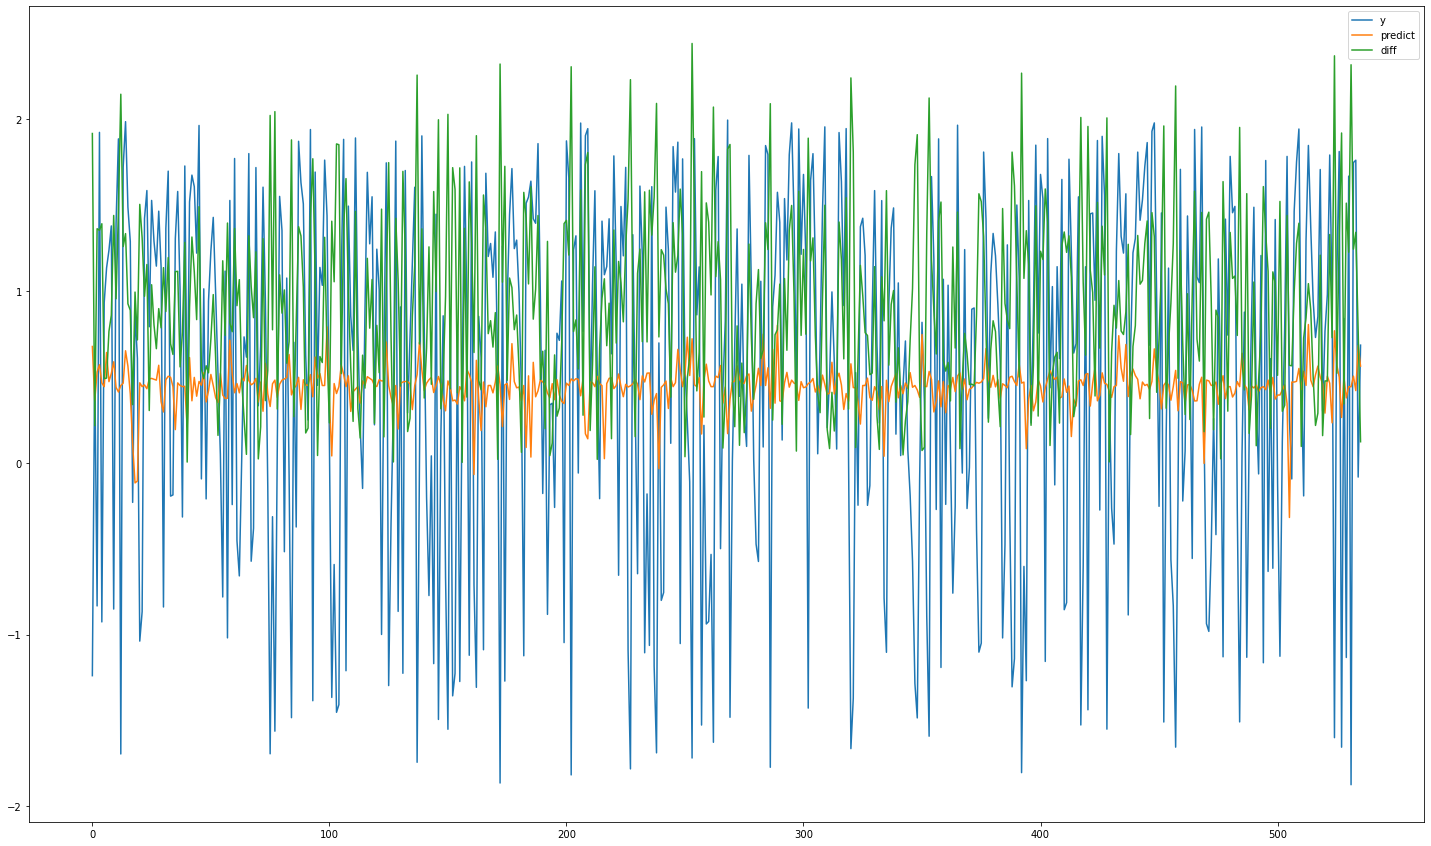

In [196]:
plt.rcParams["figure.figsize"] = (25,15)

visualize = pd.DataFrame(({'y':test_target.values, 'predict': result.predict(test_input), 'diff': np.abs(test_target.values - result.predict(test_input))}))
visualize.reset_index(drop=True, inplace=True)
visualize.plot()

In [309]:
asc_company = CRscore[CRscore['Cluster'].isin(['Cluster 2', 'Cluster 20', 'Cluster 32', 'Cluster 51', 'Cluster 56', 'Cluster 58'])]
des_company = CRscore[CRscore['Cluster'].isin(['Cluster 6', 'Cluster 24', 'Cluster 54'])]

In [310]:
asc_company

,Unnamed: 0,사업자번호,Cluster,CRscore,Unnamed: 0.1,기업코드,산업군,연구개발투자점수,연구개발기술지원점수,연구개발기술가치점수,...,광고 캠페인 효과 점수,인적자원구성점수,인적자원복지점수,인적자원개발점수,사업계획 점수,일반 평판 점수,기술혁신능력,기술사업화능력,기술혁신경영능력,기술혁신성과
357,619,1.078732e+09,Cluster 2,1.140949,2781.0,8290.0,컴퓨터시스템 통합 자문 및 구축 서비스업,-0.403454,-0.818253,-0.432391,...,-0.253130,-0.376689,-0.779913,-0.376689,0.445286,0.778274,-0.377793,-0.390280,0.147882,-0.480038
358,620,1.178167e+09,Cluster 2,1.201874,650.0,7108.0,포털 및 기타 인터넷 정보매개 서비스업,-0.403454,-0.818253,-0.432391,...,-0.253130,-0.376689,-0.779913,-0.376689,-0.810063,-0.717307,-0.377793,-0.390280,-0.769094,-0.480038
359,622,1.078758e+09,Cluster 2,0.947958,1830.0,8980.0,컴퓨터시스템 통합 자문 및 구축 서비스업,-0.403454,-0.818253,-0.432391,...,-0.253130,-0.376689,-0.779913,-0.376689,1.072960,-0.717307,-0.377793,-0.390280,-0.141420,-0.480038
360,623,7.768600e+09,Cluster 2,1.007153,2009.0,6976.0,컴퓨터시스템 통합 자문 및 구축 서비스업,-0.403454,-0.818253,-0.432391,...,-0.253130,-0.376689,-0.779913,-0.376689,-0.810063,-0.717307,-0.377793,-0.390280,-0.769094,-0.480038
361,626,1.208809e+09,Cluster 2,0.777522,2404.0,6892.0,통신 재판매업,-0.403454,-0.818253,-0.432391,...,-0.253130,-0.376689,-0.779913,-0.376689,-0.810063,-1.091202,-0.377793,-0.390280,-0.893726,-0.480038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1821,3314,2.068670e+09,Cluster 58,1.829582,4378.0,6083.0,컴퓨터시스템 통합 자문 및 구축 서비스업,-0.403454,-0.818253,-0.432391,...,3.732913,-0.376689,-0.779913,-0.376689,1.700634,2.273855,-0.377793,0.938401,1.064859,-0.480038
1822,3315,4.028144e+09,Cluster 58,1.631721,61.0,760.0,시스템 소프트웨어 개발 및 공급업,-0.403454,-0.818253,-0.432391,...,-0.253130,-0.376689,-0.779913,-0.376689,1.072960,-1.091202,-0.377793,-0.390280,-0.266052,-0.480038
1823,3316,3.148640e+09,Cluster 58,1.702237,4391.0,8417.0,응용소프트웨어 개발 및 공급업,-0.403454,-0.818253,-0.432391,...,-0.253130,-0.376689,-0.779913,-0.376689,-0.810063,0.404379,-0.377793,-0.390280,-0.395199,-0.480038
1824,3317,3.122221e+09,Cluster 58,1.681448,4239.0,6139.0,컴퓨터 프로그래밍 서비스업,-0.403454,-0.818253,-0.432391,...,-0.253130,-0.376689,-0.779913,-0.376689,-0.810063,-0.717307,-0.377793,-0.390280,-0.769094,-0.480038


In [311]:
import statsmodels.api as sm

asc_x = asc_company.iloc[:,22:]
asc_y = asc_company['CRscore']

In [314]:
from sklearn.model_selection import train_test_split

asc_train_input, asc_test_input, asc_train_target, asc_test_target = train_test_split(asc_x, asc_y, random_state = 30)

In [315]:
model = sm.OLS(asc_train_target,asc_train_input)
asc_result = model.fit()
asc_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                CRscore   R-squared (uncentered):                   0.026
Model:                            OLS   Adj. R-squared (uncentered):              0.012
Method:                 Least Squares   F-statistic:                              1.853
Date:                Fri, 29 Oct 2021   Prob (F-statistic):                       0.119
Time:                        13:40:11   Log-Likelihood:                         -479.42
No. Observations:                 277   AIC:                                      966.8
Df Residuals:                     273   BIC:                                      981.3
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
기술혁신능력         0.0206      0.107      0.192      0.848      -0.191       0.232
기술사업화능력       -0.2179      0.237     -0.919      0.359      -0.684       0.249
기술혁신경영능력       0.2605      0.174      1.501      0.135      -0.081       0.602
기술혁신성과        -0.3096      0.213     -1.456      0.147      -0.728       0.109
==============================================================================
Omnibus:                       16.793   Durbin-Watson:                   0.118
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.021
Skew:                           0.384   Prob(JB):                     1.36e-06
Kurtosis:                       4.324   Cond. No.                         3.55
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:>

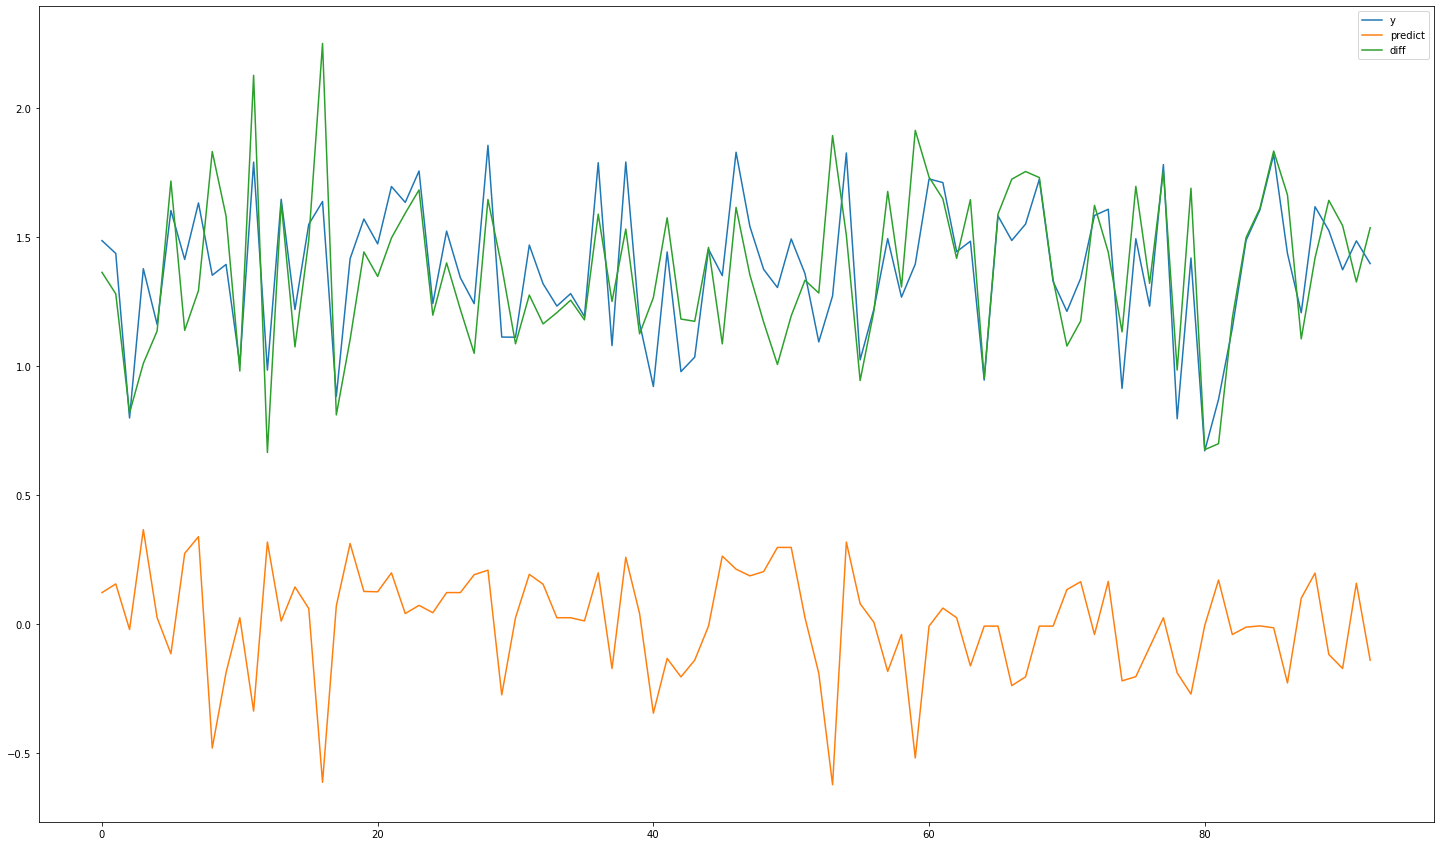

In [316]:
plt.rcParams["figure.figsize"] = (25,15)

visualize = pd.DataFrame(({'y':asc_test_target.values, 'predict': asc_result.predict(asc_test_input), 'diff': np.abs(asc_test_target.values - asc_result.predict(asc_test_input))}))
visualize.reset_index(drop=True, inplace=True)
visualize.plot()

---

In [317]:
import statsmodels.api as sm

des_x = des_company.iloc[:,22:]
des_y = des_company['CRscore']

In [318]:
from sklearn.model_selection import train_test_split

des_train_input, des_test_input, des_train_target, des_test_target = train_test_split(des_x, des_y, random_state = 30)

In [319]:
model = sm.OLS(des_train_target,des_train_input)
des_result = model.fit()
des_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                CRscore   R-squared (uncentered):                   0.080
Model:                            OLS   Adj. R-squared (uncentered):              0.048
Method:                 Least Squares   F-statistic:                              2.484
Date:                Fri, 29 Oct 2021   Prob (F-statistic):                      0.0476
Time:                        13:40:39   Log-Likelihood:                         -181.30
No. Observations:                 118   AIC:                                      370.6
Df Residuals:                     114   BIC:                                      381.7
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
기술혁신능력        -0.0501      0.107     -0.468      0.641      -0.262       0.162
기술사업화능력        0.2674      0.240      1.116      0.267      -0.207       0.742
기술혁신경영능력       0.4001      0.196      2.039      0.044       0.011       0.789
기술혁신성과        -0.5136      0.199     -2.585      0.011      -0.907      -0.120
==============================================================================
Omnibus:                       11.550   Durbin-Watson:                   0.346
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               11.910
Skew:                           0.734   Prob(JB):                      0.00259
Kurtosis:                       3.518   Cond. No.                         3.40
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:>

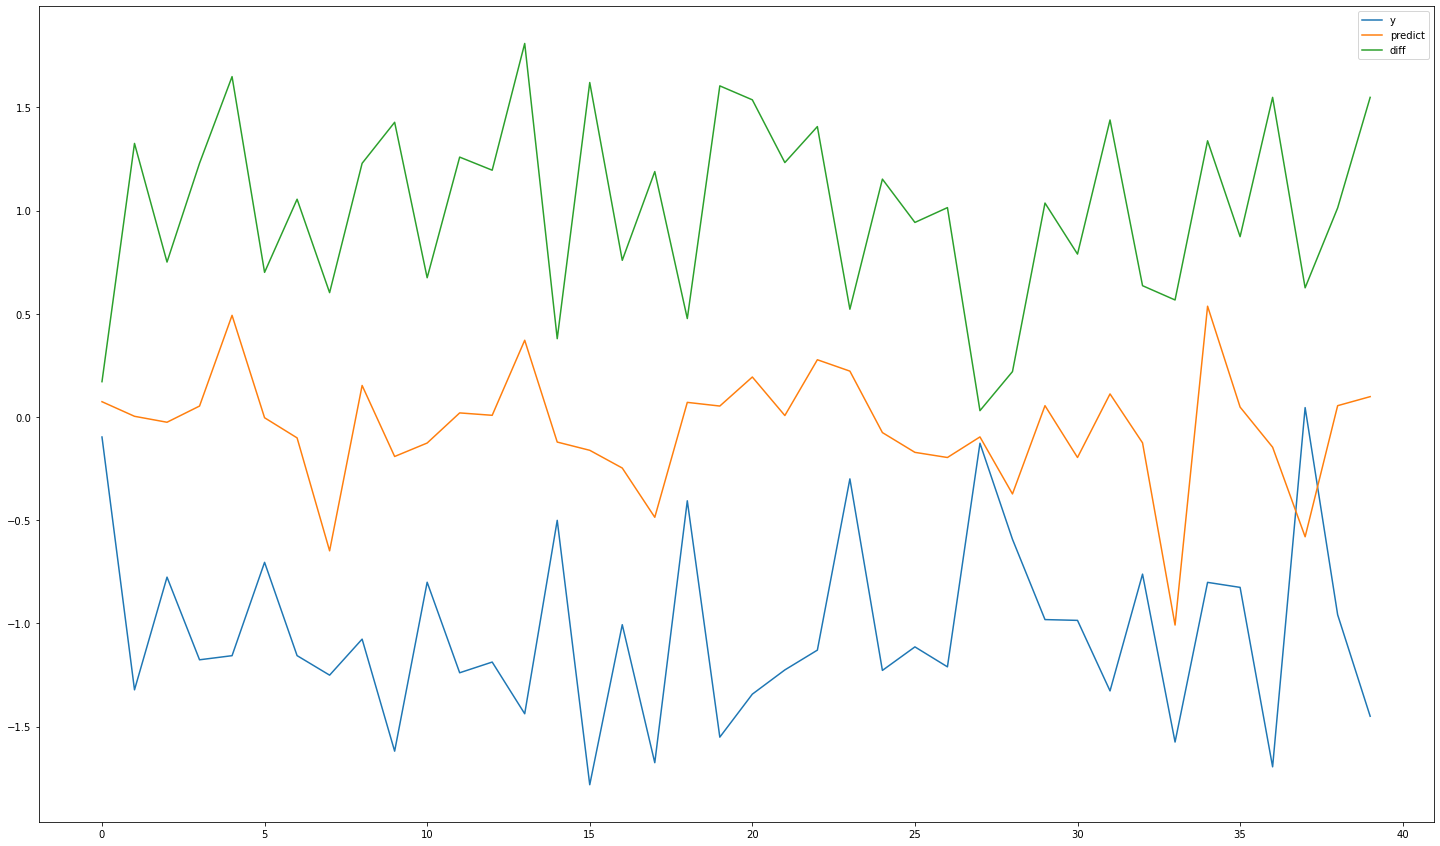

In [320]:
plt.rcParams["figure.figsize"] = (25,15)

visualize = pd.DataFrame(({'y':des_test_target.values, 'predict': des_result.predict(des_test_input), 'diff': np.abs(des_test_target.values - des_result.predict(des_test_input))}))
visualize.reset_index(drop=True, inplace=True)
visualize.plot()

---

In [322]:
raw_CR = pd.read_csv('raw_CR.csv', encoding='euc-kr')

In [323]:
CRscore = pd.merge(CRscore, raw_CR, on='사업자번호', how='left')
CRscore

,Unnamed: 0,사업자번호,Cluster_x,CRscore_x,Unnamed: 0.1,기업코드,산업군,연구개발투자점수,연구개발기술지원점수,연구개발기술가치점수,...,인적자원복지점수,인적자원개발점수,사업계획 점수,일반 평판 점수,기술혁신능력,기술사업화능력,기술혁신경영능력,기술혁신성과,Cluster_y,CRscore_y
0,2,5.838600e+09,Cluster 1,1.161925,3451.0,7634.0,응용소프트웨어 개발 및 공급업,-0.403454,-0.818253,-0.432391,...,-0.779913,-0.376689,-0.810063,-0.530359,-0.377793,-0.390280,-0.706778,-0.480038,Cluster 1,195546.40
1,3,1.148701e+09,Cluster 1,0.855668,3891.0,7546.0,유선통신업,-0.403454,-0.818253,-0.432391,...,-0.779913,-0.376689,-0.810063,0.778274,-0.377793,-0.390280,-0.270567,-0.480038,Cluster 1,615101.50
2,4,1.378613e+09,Cluster 1,1.096892,3862.0,7533.0,배전반 및 전기자동제어반 제조업,-0.403454,1.170037,-0.432391,...,1.043570,-0.376689,-0.182389,0.965222,-0.377793,0.272483,0.608801,0.200455,Cluster 1,1348854.25
3,5,2.648108e+09,Cluster 1,0.905909,5072.0,3409.0,응용소프트웨어 개발 및 공급업,-0.403454,1.170037,2.905307,...,1.043570,-0.376689,-0.810063,0.404379,-0.377793,0.272483,0.212629,1.313021,Cluster 1,528048.80
4,7,2.148826e+09,Cluster 1,1.092309,4251.0,7456.0,컴퓨터시스템 통합 자문 및 구축 서비스업,-0.403454,-0.818253,-0.432391,...,-0.779913,-0.376689,-0.810063,-0.343412,-0.377793,-0.390280,-0.644463,-0.480038,Cluster 1,145460.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2139,3839,1.218137e+09,Cluster 9,1.744492,1533.0,41.0,컴퓨터시스템 통합 자문 및 구축 서비스업,-0.403454,-0.818253,-0.432391,...,-0.779913,-0.376689,-0.810063,0.030484,-0.377793,-0.390280,-0.519831,-0.480038,Cluster 9,1066335.35
2140,3842,6.091425e+09,Cluster 9,1.736213,1706.0,4576.0,컴퓨터시스템 통합 자문 및 구축 서비스업,-0.403454,1.170037,2.070883,...,1.043570,-0.376689,1.700634,-0.717307,-0.377793,0.272483,0.675632,1.034879,Cluster 9,2680314.45
2141,3843,1.208799e+09,Cluster 9,1.161857,4411.0,6361.0,"컴퓨터 및 주변장치, 소프트웨어 도매업",-0.403454,-0.818253,-0.432391,...,-0.779913,-0.376689,-0.810063,-0.717307,-0.377793,-0.390280,-0.769094,-0.480038,Cluster 9,653764.55
2142,3844,3.038144e+09,Cluster 9,1.804883,2696.0,8819.0,"컴퓨터 및 주변장치, 소프트웨어 소매업",-0.403454,1.170037,-0.432391,...,1.043570,-0.376689,-0.182389,-0.343412,-0.377793,0.290918,0.172590,0.200455,Cluster 9,277206.80


In [329]:
import statsmodels.api as sm

x = CRscore.iloc[:,22:26]
y = CRscore['CRscore_y']

In [331]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(x, y, random_state = 30)

In [332]:
model = sm.OLS(des_train_target,des_train_input)
des_result = model.fit()
des_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                CRscore   R-squared (uncentered):                   0.080
Model:                            OLS   Adj. R-squared (uncentered):              0.048
Method:                 Least Squares   F-statistic:                              2.484
Date:                Fri, 29 Oct 2021   Prob (F-statistic):                      0.0476
Time:                        13:54:37   Log-Likelihood:                         -181.30
No. Observations:                 118   AIC:                                      370.6
Df Residuals:                     114   BIC:                                      381.7
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
기술혁신능력        -0.0501      0.107     -0.468      0.641      -0.262       0.162
기술사업화능력        0.2674      0.240      1.116      0.267      -0.207       0.742
기술혁신경영능력       0.4001      0.196      2.039      0.044       0.011       0.789
기술혁신성과        -0.5136      0.199     -2.585      0.011      -0.907      -0.120
==============================================================================
Omnibus:                       11.550   Durbin-Watson:                   0.346
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               11.910
Skew:                           0.734   Prob(JB):                      0.00259
Kurtosis:                       3.518   Cond. No.                         3.40
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:>

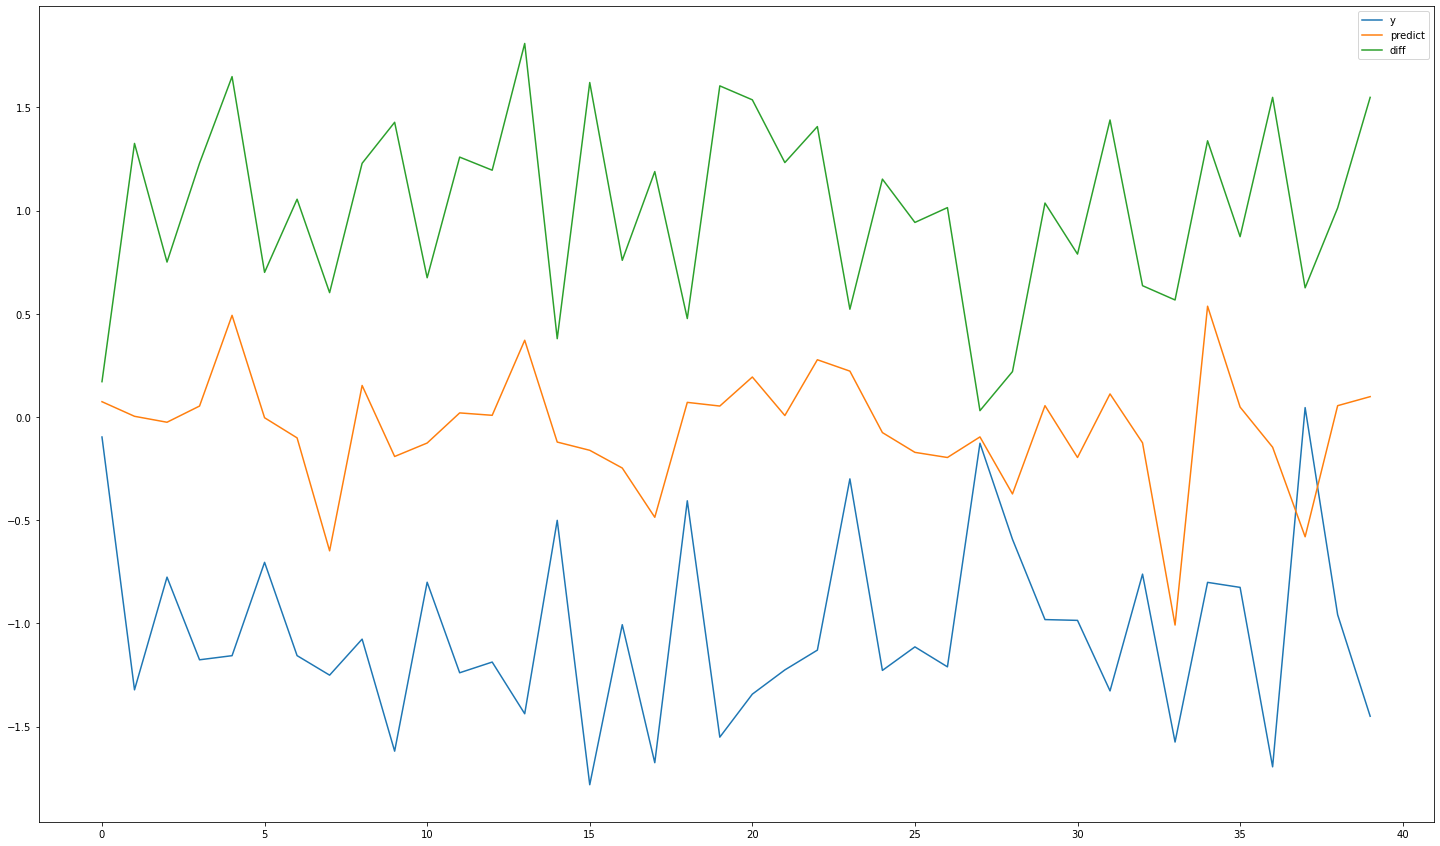

In [333]:
plt.rcParams["figure.figsize"] = (25,15)

visualize = pd.DataFrame(({'y':des_test_target.values, 'predict': des_result.predict(des_test_input), 'diff': np.abs(des_test_target.values - des_result.predict(des_test_input))}))
visualize.reset_index(drop=True, inplace=True)
visualize.plot()